<a href="https://colab.research.google.com/github/bellottisofia/Innovation_Adoption_Parameters/blob/main/socio_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('/content/(3)_NL_EVsurvey_data_EN_datavalues.csv')

In [15]:
# Define a mapping dictionary
mapping = {1: 1, 2: 1, 3: 0, 99999997: 0}

# Apply the mapping to the target variable
df['nQ16'] = df['nQ16'].map(mapping)

In [16]:
X=df[[
 'nAgeCat',
 'xHighLevEdu',
 'xIncome',
 'nIncCat',
 'nProv',
 'nGen',
 'nAg',
 'nEdu',
 'nReg']]
y=df['nQ16']

In [17]:
chi_scores = chi2(X,y)

In [18]:
chi_scores

(array([1.04623063e+01, 8.81361113e+01, 1.00266924e+09, 2.31649406e-03,
        1.45579788e+00, 1.33510291e+00, 1.04623063e+01, 2.42229151e+01,
        1.12417075e+00]),
 array([1.21835078e-03, 6.11018987e-21, 0.00000000e+00, 9.61612661e-01,
        2.27599908e-01, 2.47899429e-01, 1.21835078e-03, 8.58052739e-07,
        2.89022152e-01]))

In [19]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

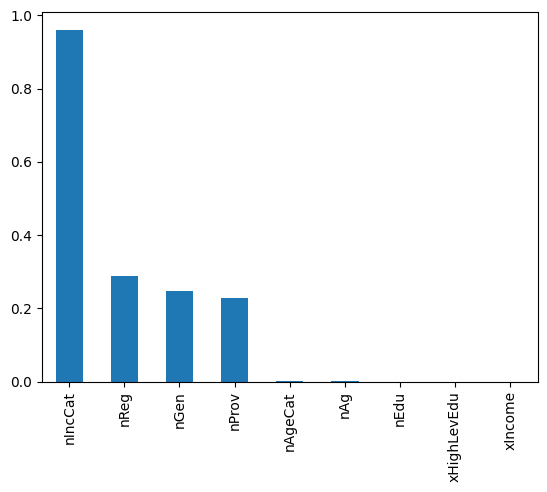

In [20]:
p_values.plot.bar()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)


# Get feature importances
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


print("Feature Importance considering buying an EV")
print(feat_imp.head(10))


Feature Importance considering buying an EV
nProv          0.234288
xHighLevEdu    0.151977
xIncome        0.150094
nReg           0.130585
nAg            0.079396
nAgeCat        0.078912
nGen           0.074653
nIncCat        0.055921
nEdu           0.044173
dtype: float64


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd

results = []

for col in X.columns:
    X_single = X[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_single, y)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)



       Feature  F1 Score  ROC AUC
1  xHighLevEdu     0.589    0.676
2      xIncome     0.577    0.642
5         nGen     0.568    0.567
3      nIncCat     0.559    0.624
0      nAgeCat     0.549    0.552
6          nAg     0.549    0.552
4        nProv     0.470    0.491
7         nEdu     0.468    0.660
8         nReg     0.275    0.473


In [27]:
df2 = pd.read_csv('/content/(6)_Transnational_EVsurvey_datavalues.csv')
# Apply the mapping to the target variable
df2['Q16'] = df2['Q16'].map(mapping)

Germany

In [28]:
columnToFilter = "Country"
itemToFilter = 6

columnToFilter = columnToFilter.capitalize()


df_ger = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_Ger=df_ger[['Gender',
 'RegionGermany',
 'PunchRegionGermany',
 'EducationGermany',
 'Edu',
 'PoliticsGermany','lft', 'Lftcat'
 ]]
y2=df_ger['Q16']

In [29]:
chi_scores2 = chi2(X_Ger,y2)

In [30]:
chi_scores2

(array([6.13998589e+00, 1.52027750e-02, 2.88104134e-01, 2.11217832e+01,
        8.01845201e+00, 3.03098845e+09, 2.37850720e+02, 2.38522079e+01]),
 array([1.32158368e-02, 9.01869910e-01, 5.91438015e-01, 4.31000834e-06,
        4.63031307e-03, 0.00000000e+00, 1.15705273e-53, 1.04022499e-06]))

In [31]:
p_values2 = pd.Series(chi_scores2[1],index = X_Ger.columns)
p_values2.sort_values(ascending = False , inplace = True)

<Axes: >

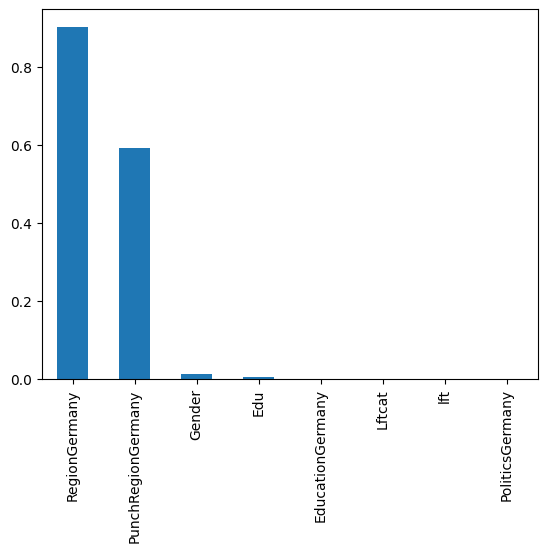

In [32]:
p_values2.plot.bar()

In [33]:

model_ger = RandomForestClassifier()
model_ger.fit(X_Ger, y2)


# Get feature importances
feat_imp_ger = pd.Series(model_ger.feature_importances_, index=X_Ger.columns).sort_values(ascending=False)


print("Feature Importance considering buying an EV")
print(feat_imp_ger.head(10))

Feature Importance considering buying an EV
lft                   0.305264
PoliticsGermany       0.219917
RegionGermany         0.143056
EducationGermany      0.101918
PunchRegionGermany    0.082283
Lftcat                0.067188
Gender                0.044080
Edu                   0.036295
dtype: float64


Hungary

In [34]:
columnToFilter = "Country"
itemToFilter = 31

columnToFilter = columnToFilter.capitalize()


df_hun = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_hun=df_hun[['Gender',
 'RegionHungary',
 'PunchRegionHungary',
 'EducationHungary',
 'Edu',
 'PoliticsHungary','lft', 'Lftcat'
 ]]
y_hun=df_hun['Q16']

In [35]:
chi_scores_hun = chi2(X_hun,y_hun)

In [36]:
p_values_hun = pd.Series(chi_scores_hun[1],index = X_hun.columns)
p_values_hun.sort_values(ascending = False , inplace = True)

<Axes: >

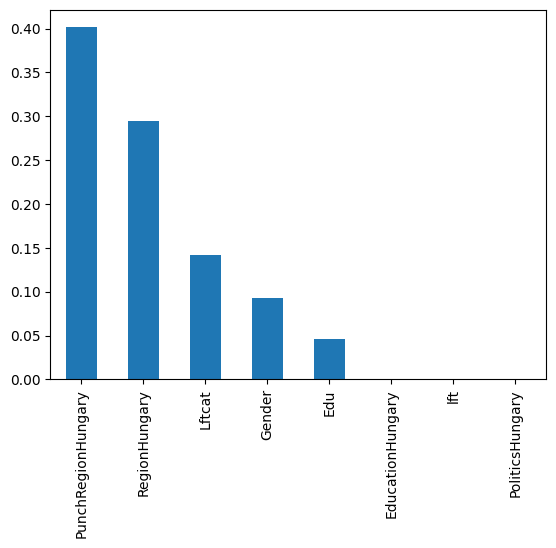

In [37]:
p_values_hun.plot.bar()

In [38]:

model_hun = RandomForestClassifier()
model_hun.fit(X_hun, y_hun)


# Get feature importances
feat_imp_hun = pd.Series(model_hun.feature_importances_, index=X_hun.columns).sort_values(ascending=False)


print("Feature Importance considering buying an EV")
print(feat_imp_hun.head(10))

Feature Importance considering buying an EV
lft                   0.300790
RegionHungary         0.180547
PoliticsHungary       0.176915
EducationHungary      0.098920
PunchRegionHungary    0.091137
Lftcat                0.075794
Gender                0.041783
Edu                   0.034113
dtype: float64


Norway

In [39]:
columnToFilter = "Country"
itemToFilter = 36

columnToFilter = columnToFilter.capitalize()


df_nor = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_nor=df_nor[['Gender',
 'RegionNorway',
 'PunchRegionNorway',
 'EducationNorway',
 'Edu',
 'PoliticsNorway','lft', 'Lftcat'
 ]]
y_nor=df_nor['Q16']

<Axes: >

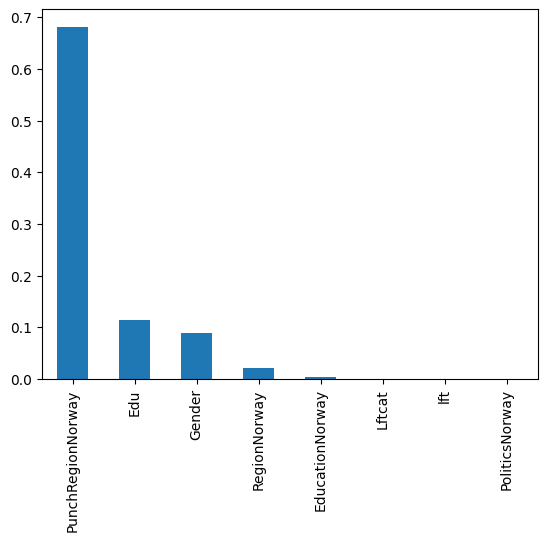

In [40]:
chi_scores_nor = chi2(X_nor,y_nor)
p_values_nor = pd.Series(chi_scores_nor[1],index = X_nor.columns)
p_values_nor.sort_values(ascending = False , inplace = True)
p_values_nor.plot.bar()

In [41]:
model_nor = RandomForestClassifier()
model_nor.fit(X_nor, y_nor)


# Get feature importances
feat_imp_nor = pd.Series(model_nor.feature_importances_, index=X_nor.columns).sort_values(ascending=False)


print("Feature Importance considering buying an EV")
print(feat_imp_nor.head(10))

Feature Importance considering buying an EV
lft                  0.296560
PoliticsNorway       0.185819
RegionNorway         0.169467
PunchRegionNorway    0.107170
EducationNorway      0.087696
Lftcat               0.070492
Gender               0.044606
Edu                  0.038189
dtype: float64


Denmark

In [42]:
columnToFilter = "Country"
itemToFilter = 37

columnToFilter = columnToFilter.capitalize()


df_den = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_den=df_den[['Gender',
 'RegionDenmark',
 'EducationDenmark',
 'Edu',
 'PoliticsDenmark','lft', 'Lftcat'
 ]]
y_den=df_den['Q16']

<Axes: >

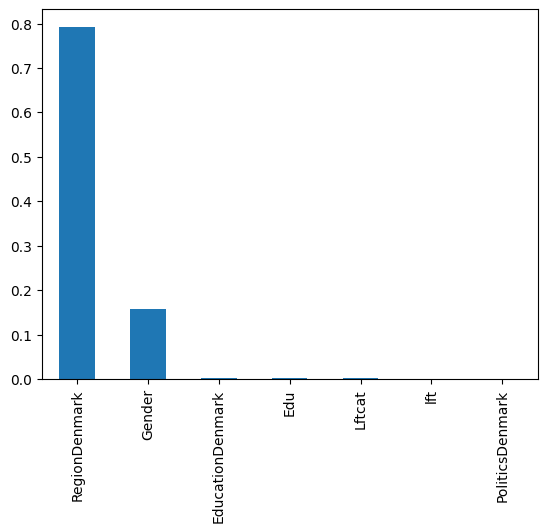

In [43]:
chi_scores_den = chi2(X_den,y_den)
p_values_den = pd.Series(chi_scores_den[1],index = X_den.columns)
p_values_den.sort_values(ascending = False , inplace = True)

p_values_den.plot.bar()

In [44]:
model_den = RandomForestClassifier()
model_den.fit(X_den, y_den)


# Get feature importances
feat_imp_den = pd.Series(model_den.feature_importances_, index=X_den.columns).sort_values(ascending=False)


print("Feature Importance considering buying an EV")
print(feat_imp_den.head(10))

Feature Importance considering buying an EV
lft                 0.420974
PoliticsDenmark     0.233508
RegionDenmark       0.172131
Lftcat              0.073159
Gender              0.040519
EducationDenmark    0.030895
Edu                 0.028813
dtype: float64
